## Develop a Sentiment Analysis Model for Film Reviews to Classify Audience Emotions and Insights

### Sentiment with Logistic Regression

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Processing 

In [55]:
df = pd.read_csv("momo_reviews_labeled.csv") 

# Sử dụng nội dung giữ dấu và nhãn
X_text = df["Noi_dung_sach_giu_dau"]
y_label = df["label"]


In [ ]:
# # File đã cân bằng
# df = pd.read_csv("momo_reviews_balanced.csv") 

# # Sử dụng nội dung giữ dấu và nhãn
# X_text = df["Noi_dung_sach_giu_dau"]
# y_label = df["label"]

#### TF-IDF 

In [56]:
# TF-IDF vector hóa văn bản
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)


In [57]:
# Cân bằng bằng Oversampling + SMOTE
# Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_tfidf, y_label)

# SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_ros, y_ros)


In [58]:
from collections import Counter

print(Counter(y_balanced))

Counter({'Tích cực': 4801, 'Trung lập': 4801, 'Tiêu cực': 4801})


In [59]:
import pandas as pd

pd.Series(y_balanced).value_counts()

label
Tích cực     4801
Trung lập    4801
Tiêu cực     4801
Name: count, dtype: int64

In [60]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, stratify=y_balanced, test_size=0.2, random_state=42
)

### Logistic Regression 

In [61]:
# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

    Tiêu cực       0.94      0.97      0.95       960
   Trung lập       0.92      0.97      0.95       960
    Tích cực       0.97      0.89      0.93       961

    accuracy                           0.94      2881
   macro avg       0.94      0.94      0.94      2881
weighted avg       0.94      0.94      0.94      2881



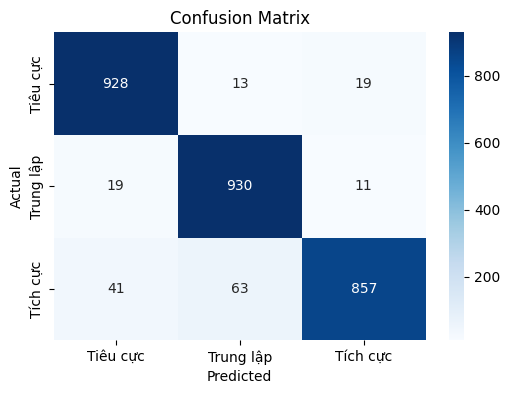

In [62]:
# Đánh giá mô hình
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_,
            cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Hàm phân tích cảm xúc review
def predict_sentiment(text):
    input_vector = vectorizer.transform([text])
    probs = model.predict_proba(input_vector)[0]
    labels = model.classes_

    print("Phân bố cảm xúc:")
    for label, prob in zip(labels, probs):
        print(f"  {label}: {prob * 100:.2f}%")

    pred_index = np.argmax(probs)
    return labels[pred_index], probs[pred_index]

# Ví dụ
sample_review = "Diễn viên tốt nhưng kịch bản hơi chán."
sentiment, confidence = predict_sentiment(sample_review)

print(f"\n Kết quả: {sentiment} ({confidence:.2f} confidence)")
print(f"Nhận định: Diễn xuất được khen, nhưng kịch bản có vấn đề.")


Phân bố cảm xúc:
  Tiêu cực: 25.16%
  Trung lập: 56.20%
  Tích cực: 18.64%

 Kết quả: Trung lập (0.56 confidence)
Nhận định: Diễn xuất được khen, nhưng kịch bản có vấn đề.


###  Logistic Regression – Naive Bayes – SVM – Random Forest – KNN

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

In [66]:
# Chia tập train/test từ dữ liệu đã cân bằng
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, stratify=y_balanced, test_size=0.2, random_state=42
)

In [67]:
# Khởi tạo các mô hình cần so sánh
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC(dual=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

In [68]:
# Huấn luyện và đánh giá từng mô hình
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({"Model": name, "Accuracy": acc, "F1-macro": f1})
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    


=== Logistic Regression ===
              precision    recall  f1-score   support

    Tiêu cực       0.94      0.97      0.95       960
   Trung lập       0.92      0.97      0.95       960
    Tích cực       0.97      0.89      0.93       961

    accuracy                           0.94      2881
   macro avg       0.94      0.94      0.94      2881
weighted avg       0.94      0.94      0.94      2881


=== Naive Bayes ===
              precision    recall  f1-score   support

    Tiêu cực       0.90      0.90      0.90       960
   Trung lập       0.81      0.91      0.86       960
    Tích cực       0.90      0.78      0.84       961

    accuracy                           0.86      2881
   macro avg       0.87      0.87      0.86      2881
weighted avg       0.87      0.86      0.86      2881


=== SVM (Linear) ===
              precision    recall  f1-score   support

    Tiêu cực       0.96      0.99      0.98       960
   Trung lập       0.95      0.99      0.97       960
   

In [69]:
import pandas as pd

# Tạo bảng từ kết quả
results_df = pd.DataFrame(results)

results_df.style.set_caption("BẢNG SO SÁNH HIỆU SUẤT") \
    .format({"Accuracy": "{:.2%}", "F1-macro": "{:.2%}"}) \
    .set_table_styles([{"selector": "th", "props": [("text-align", "center")]}]) \
    .set_properties(**{"text-align": "center"})


,Model,Accuracy,F1-macro
0,Logistic Regression,94.24%,94.21%
1,Naive Bayes,86.50%,86.46%
2,SVM (Linear),96.81%,96.78%
3,Random Forest,99.86%,99.86%
4,KNN (k=5),92.61%,92.34%


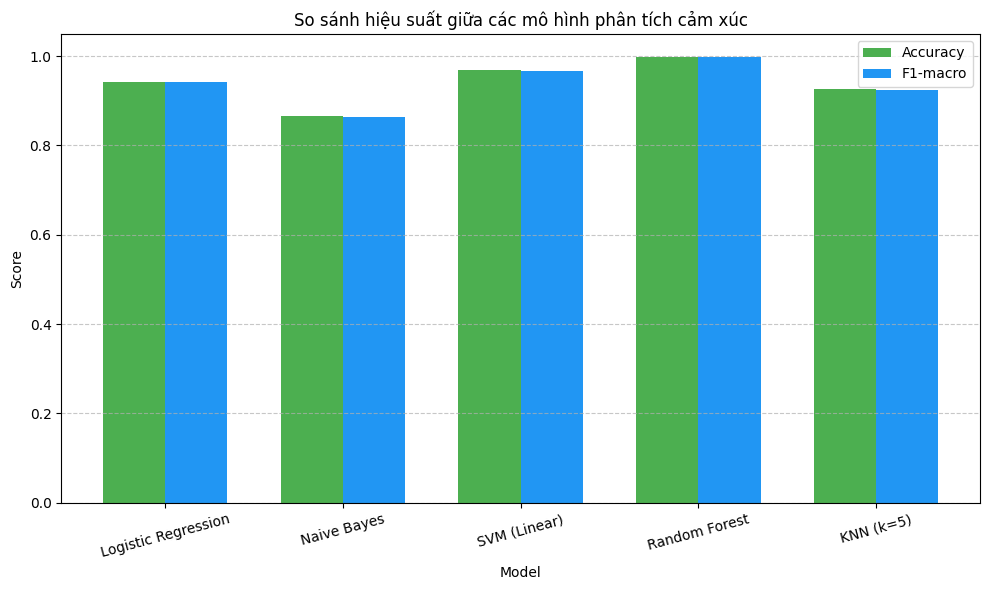

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Thiết lập dữ liệu
models = results_df["Model"]
accuracy = results_df["Accuracy"]
f1_macro = results_df["F1-macro"]

x = np.arange(len(models))  # vị trí các mô hình
width = 0.35  # độ rộng của mỗi cột

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='#4CAF50')
plt.bar(x + width/2, f1_macro, width, label='F1-macro', color='#2196F3')

# Thêm chi tiết
plt.ylabel('Score')
plt.xlabel('Model')
plt.title('So sánh hiệu suất giữa các mô hình phân tích cảm xúc')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.05)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị
plt.tight_layout()
plt.show()
